<a href="https://colab.research.google.com/github/shexx/Churn-Project/blob/main/Churn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement #
*Utilise data to Identify customers who have a high risk of churning; so that the retention team can target maximum number of churners. It is to be noted that the stakeholders have already taken a decision to provide 50% discount for high risk churners.*

*Problem: Identify customers in dataset who are at high risk of churning*

# Framing: Proposed Solution #

*What type of learning/modelling problem it is - Supervised/Unsupervised >> Regression or Classfication Problem. State what is your response variable here. List out the modelling techniques that you will employ in trying to solve the problem*

Type of Learning/Modelling: Supervised >> Classification problem

Response Variable: Risk of Churning (In our datasets the variable is SubscriptionStatus)

Modelling Techniques:
1. Split churn_df dataset into training and test datasets - 70%-30% split (70% is for training)
2. Run model: Logistic Regression




# Data Understanding #

*Create a small data dictionary of the datasets provided for the task. Check online what a data dictionary is and make a note of each variable and what you really understand about the variable*

Google spreadsheet of data dictionary: https://docs.google.com/spreadsheets/d/1cWFP4vmBp5Qxxn0sfa7lsTMGp2qE7t7RfypXB3het4E/edit#gid=0

# Data Preparation #

*Steps in Data Preparation*

1.   Exploratory Data Analysis
2.   Feature Selection 
3.   Creating Dummy Variables




## Exploratory Data Analysis ##


1.   Descriptive Statistics - Checking Central Tendencies & Distribution of numerical variables, Check Frequency distribution for Categorical variables.
2.   Anomaly Detection - Checking & Treatment of Missing Value & Outliers
2.   Correlation Matrix, Checking for Multi-collinearity
3.   Relationship between response & predictor variables - (Chi Sq., Correlation, Pt.Biserial Correlation)
4.   Visualisation for analysing data
5.   Any other EDA Techniques 




### Descriptive Statistics ###

#### Loading the data ####


In [ ]:
#package required for operations with pandas dataframe
import pandas as pd


#loading the dataset 
churn1 = pd.read_csv("/content/Modelling Task (Dataset 1).csv")
churn2 = pd.read_csv("/content/Modelling Task (Dataset 2).csv")

#### View the datasets ####


In [ ]:
churn1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SubscriptionCancelled
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
churn2.head(3)

,CustomerId,SubscriptionStatus,CallsPerMonth
0,7590-VHVEG,Active,30
1,5575-GNVDE,Active,10
2,3668-QPYBK,Cancelled,10


#### Distinct Customer Ids ####

In [ ]:
churn1.customerID.nunique()

7043

In [ ]:
churn2.CustomerId.nunique()

7043

#### Merge the Datasets ####

*Check wether you want an inner, left, outer or cross join? Do you know the difference between each of these techniques?*

*I shall demonstrate a inner join here*

##### Inner Join #####

In [ ]:
churn_df = pd.merge(churn1, churn2, how = 'inner', left_on = ['customerID'], right_on = ['CustomerId'])

#### No. of rows & Columns ####

In [ ]:
churn_df.shape

(7043, 24)

#### Make up of Response Variable #### 

##### Unique Categories of Response Variable #####

In [ ]:
churn_df.SubscriptionStatus.value_counts()

Active       5174
Cancelled    1869
Name: SubscriptionStatus, dtype: int64

In [ ]:
churn_df.groupby(['SubscriptionStatus'])['customerID'].nunique()

SubscriptionStatus
Active       5174
Cancelled    1869
Name: customerID, dtype: int64

In [ ]:
churn_df.SubscriptionStatus.value_counts(normalize=True)

Active       0.73463
Cancelled    0.26537
Name: SubscriptionStatus, dtype: float64

#### Data types of the variables ####

In [ ]:
churn_df.dtypes

customerID                object
gender                    object
SeniorCitizen              int64
Partner                   object
Dependents                object
tenure                     int64
PhoneService              object
MultipleLines             object
InternetService           object
OnlineSecurity            object
OnlineBackup              object
DeviceProtection          object
TechSupport               object
StreamingTV               object
StreamingMovies           object
Contract                  object
PaperlessBilling          object
PaymentMethod             object
MonthlyCharges           float64
TotalCharges              object
SubscriptionCancelled     object
CustomerId                object
SubscriptionStatus        object
CallsPerMonth              int64
dtype: object

#### Statistics using Describe() ####

*Why isn't Total Charges appearing in descriptive statistics of numerical variables. The datatype view above also suggests that it isn't a numerical field for some reason*

In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,CallsPerMonth
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,29.973449
std,0.368612,24.559481,30.090047,14.720254
min,0.000000,0.000000,18.250000,5.000000
25%,0.000000,9.000000,35.500000,17.000000
50%,0.000000,29.000000,70.350000,30.000000
75%,0.000000,55.000000,89.850000,43.000000
max,1.000000,72.000000,118.750000,55.000000


##### Changing the datatype of Total Charges to Float #####

In [ ]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')
churn_df.dtypes

customerID                object
gender                    object
SeniorCitizen              int64
Partner                   object
Dependents                object
tenure                     int64
PhoneService              object
MultipleLines             object
InternetService           object
OnlineSecurity            object
OnlineBackup              object
DeviceProtection          object
TechSupport               object
StreamingTV               object
StreamingMovies           object
Contract                  object
PaperlessBilling          object
PaymentMethod             object
MonthlyCharges           float64
TotalCharges             float64
SubscriptionCancelled     object
CustomerId                object
SubscriptionStatus        object
CallsPerMonth              int64
dtype: object

In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,CallsPerMonth
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,29.973449
std,0.368612,24.559481,30.090047,2266.771362,14.720254
min,0.000000,0.000000,18.250000,18.800000,5.000000
25%,0.000000,9.000000,35.500000,401.450000,17.000000
50%,0.000000,29.000000,70.350000,1397.475000,30.000000
75%,0.000000,55.000000,89.850000,3794.737500,43.000000
max,1.000000,72.000000,118.750000,8684.800000,55.000000


#### Check custom descriptive statistics measures ####

In [ ]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

In [ ]:
churn_df.agg({'TotalCharges':['count', 'sum', 'min', 'max', 'mean', 'median', 'std', 'sem', q25, q50, q75]})

,TotalCharges
count,7.032000e+03
sum,1.605617e+07
min,1.880000e+01
max,8.684800e+03
mean,2.283300e+03
median,1.397475e+03
std,2.266771e+03
sem,2.703138e+01
q25,4.014500e+02
q50,1.397475e+03


#### Descriptive Statistics of Numberical & Categorical Variables ####

*The most useful thing it says is the unique number of categories*

In [ ]:
churn_df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SubscriptionCancelled,CustomerId,SubscriptionStatus
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,7043,2
top,8532-UEFWH,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,8532-UEFWH,Active
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,1,5174


#### Understanding Distribution of Variables ####

##### Distribution Plots for Numerical #####

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

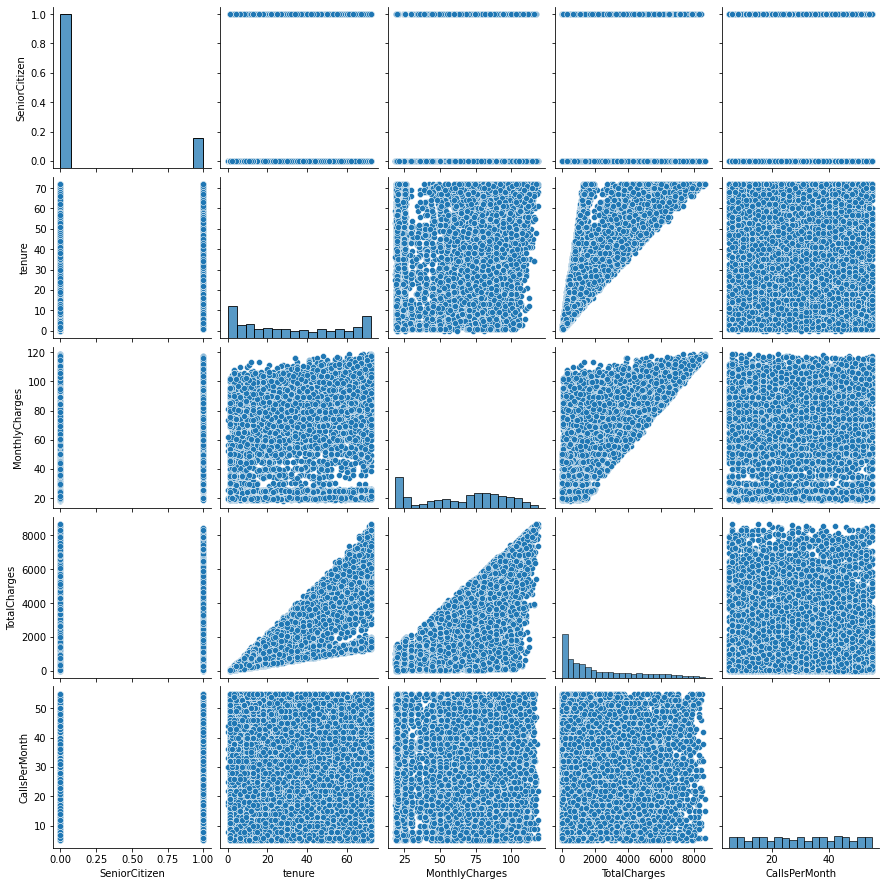

In [ ]:
sns.pairplot(churn_df)

Text(0.5, 1.0, 'Tenure Distribution')

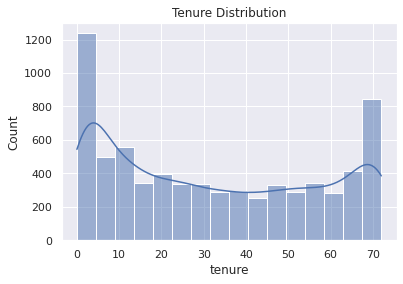

In [ ]:
sns.set_theme()
sns.histplot(churn_df['tenure'],kde = True, stat = "count").set_title('Tenure Distribution')

Text(0.5, 1.0, 'Calls Per Distribution')

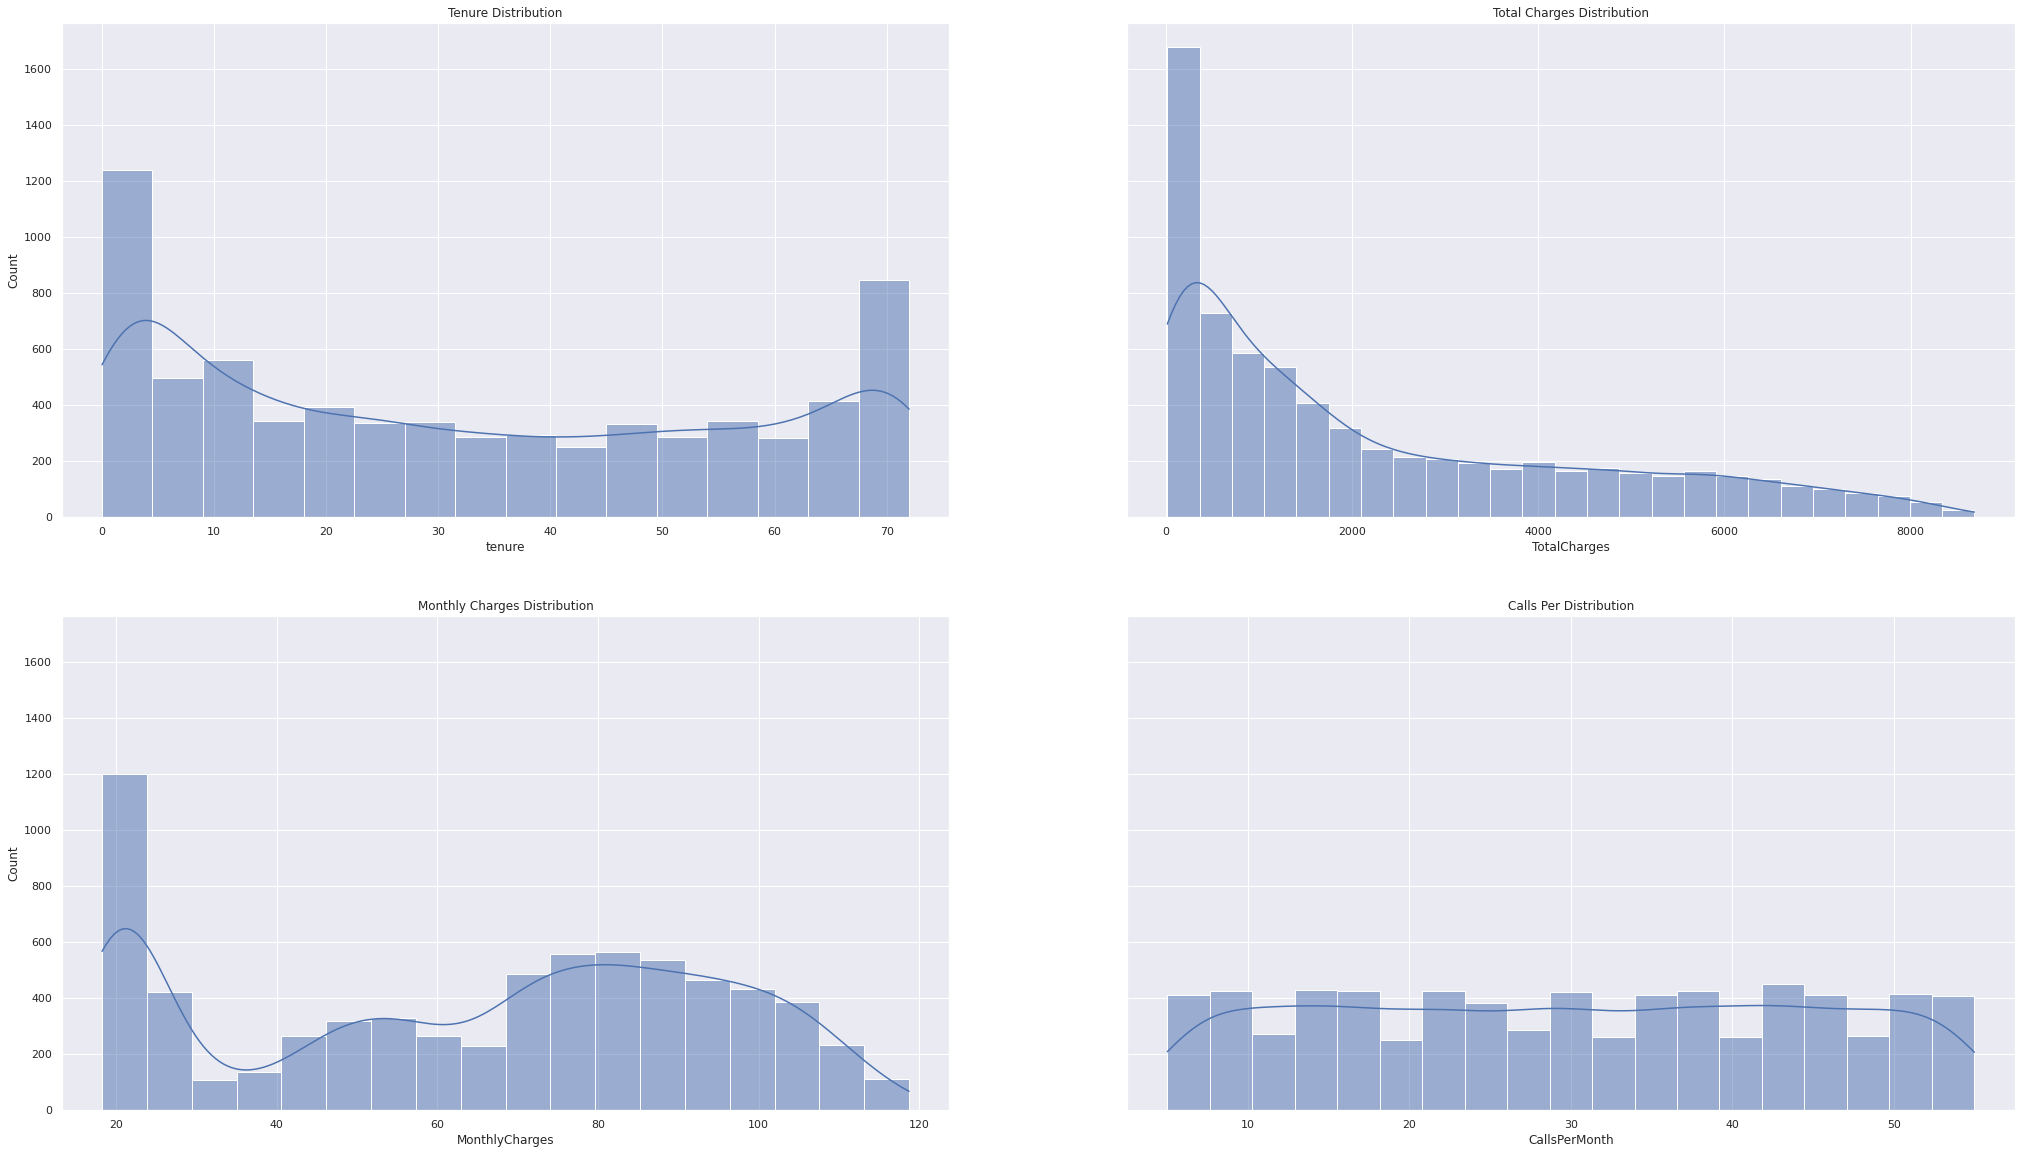

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(35, 20), sharey=True)
sns.set_theme()

sns.histplot(churn_df['tenure'],ax=axes[0, 0], kde = True)
sns.histplot(churn_df['TotalCharges'], ax=axes[0, 1], kde = True)
sns.histplot(churn_df['MonthlyCharges'], ax=axes[1, 0], kde = True)
sns.histplot(churn_df['CallsPerMonth'], ax=axes[1, 1], kde = True)

axes[0,0].set_title('Tenure Distribution')
axes[0,1].set_title('Total Charges Distribution')
axes[1,0].set_title('Monthly Charges Distribution')
axes[1,1].set_title('Calls Per Distribution')

##### Distribution of Categorical variables #####

In [ ]:
#Create a subset of dataframe with only categorical variables
churn_df_2 =churn_df.select_dtypes(object)

In [ ]:
churn_df_2.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'SubscriptionCancelled', 'CustomerId', 'SubscriptionStatus'],
      dtype='object')

In [ ]:
churn_df_2 = churn_df_2.drop(columns=['customerID', 'CustomerId'])

In [ ]:
v0 = pd.DataFrame(churn_df['gender'].value_counts())
v1 = pd.DataFrame(churn_df['gender'].value_counts(normalize = True))
v2 = pd.DataFrame(churn_df['Partner'].value_counts(normalize = True))
v3 = pd.DataFrame(churn_df['SubscriptionStatus'].value_counts(normalize = True))
display(v0, v1, v2, v3)

,gender
Male,3555
Female,3488


,gender
Male,0.504756
Female,0.495244


,Partner
No,0.516967
Yes,0.483033


,SubscriptionStatus
Active,0.73463
Cancelled,0.26537


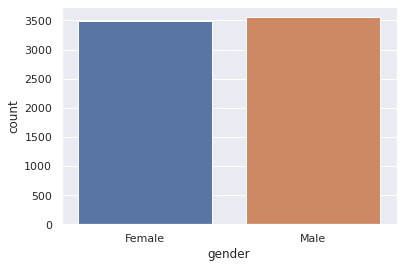

In [ ]:
sns.countplot(x= churn_df['gender'])

##### Categorical Variables Proportional Distribution #####

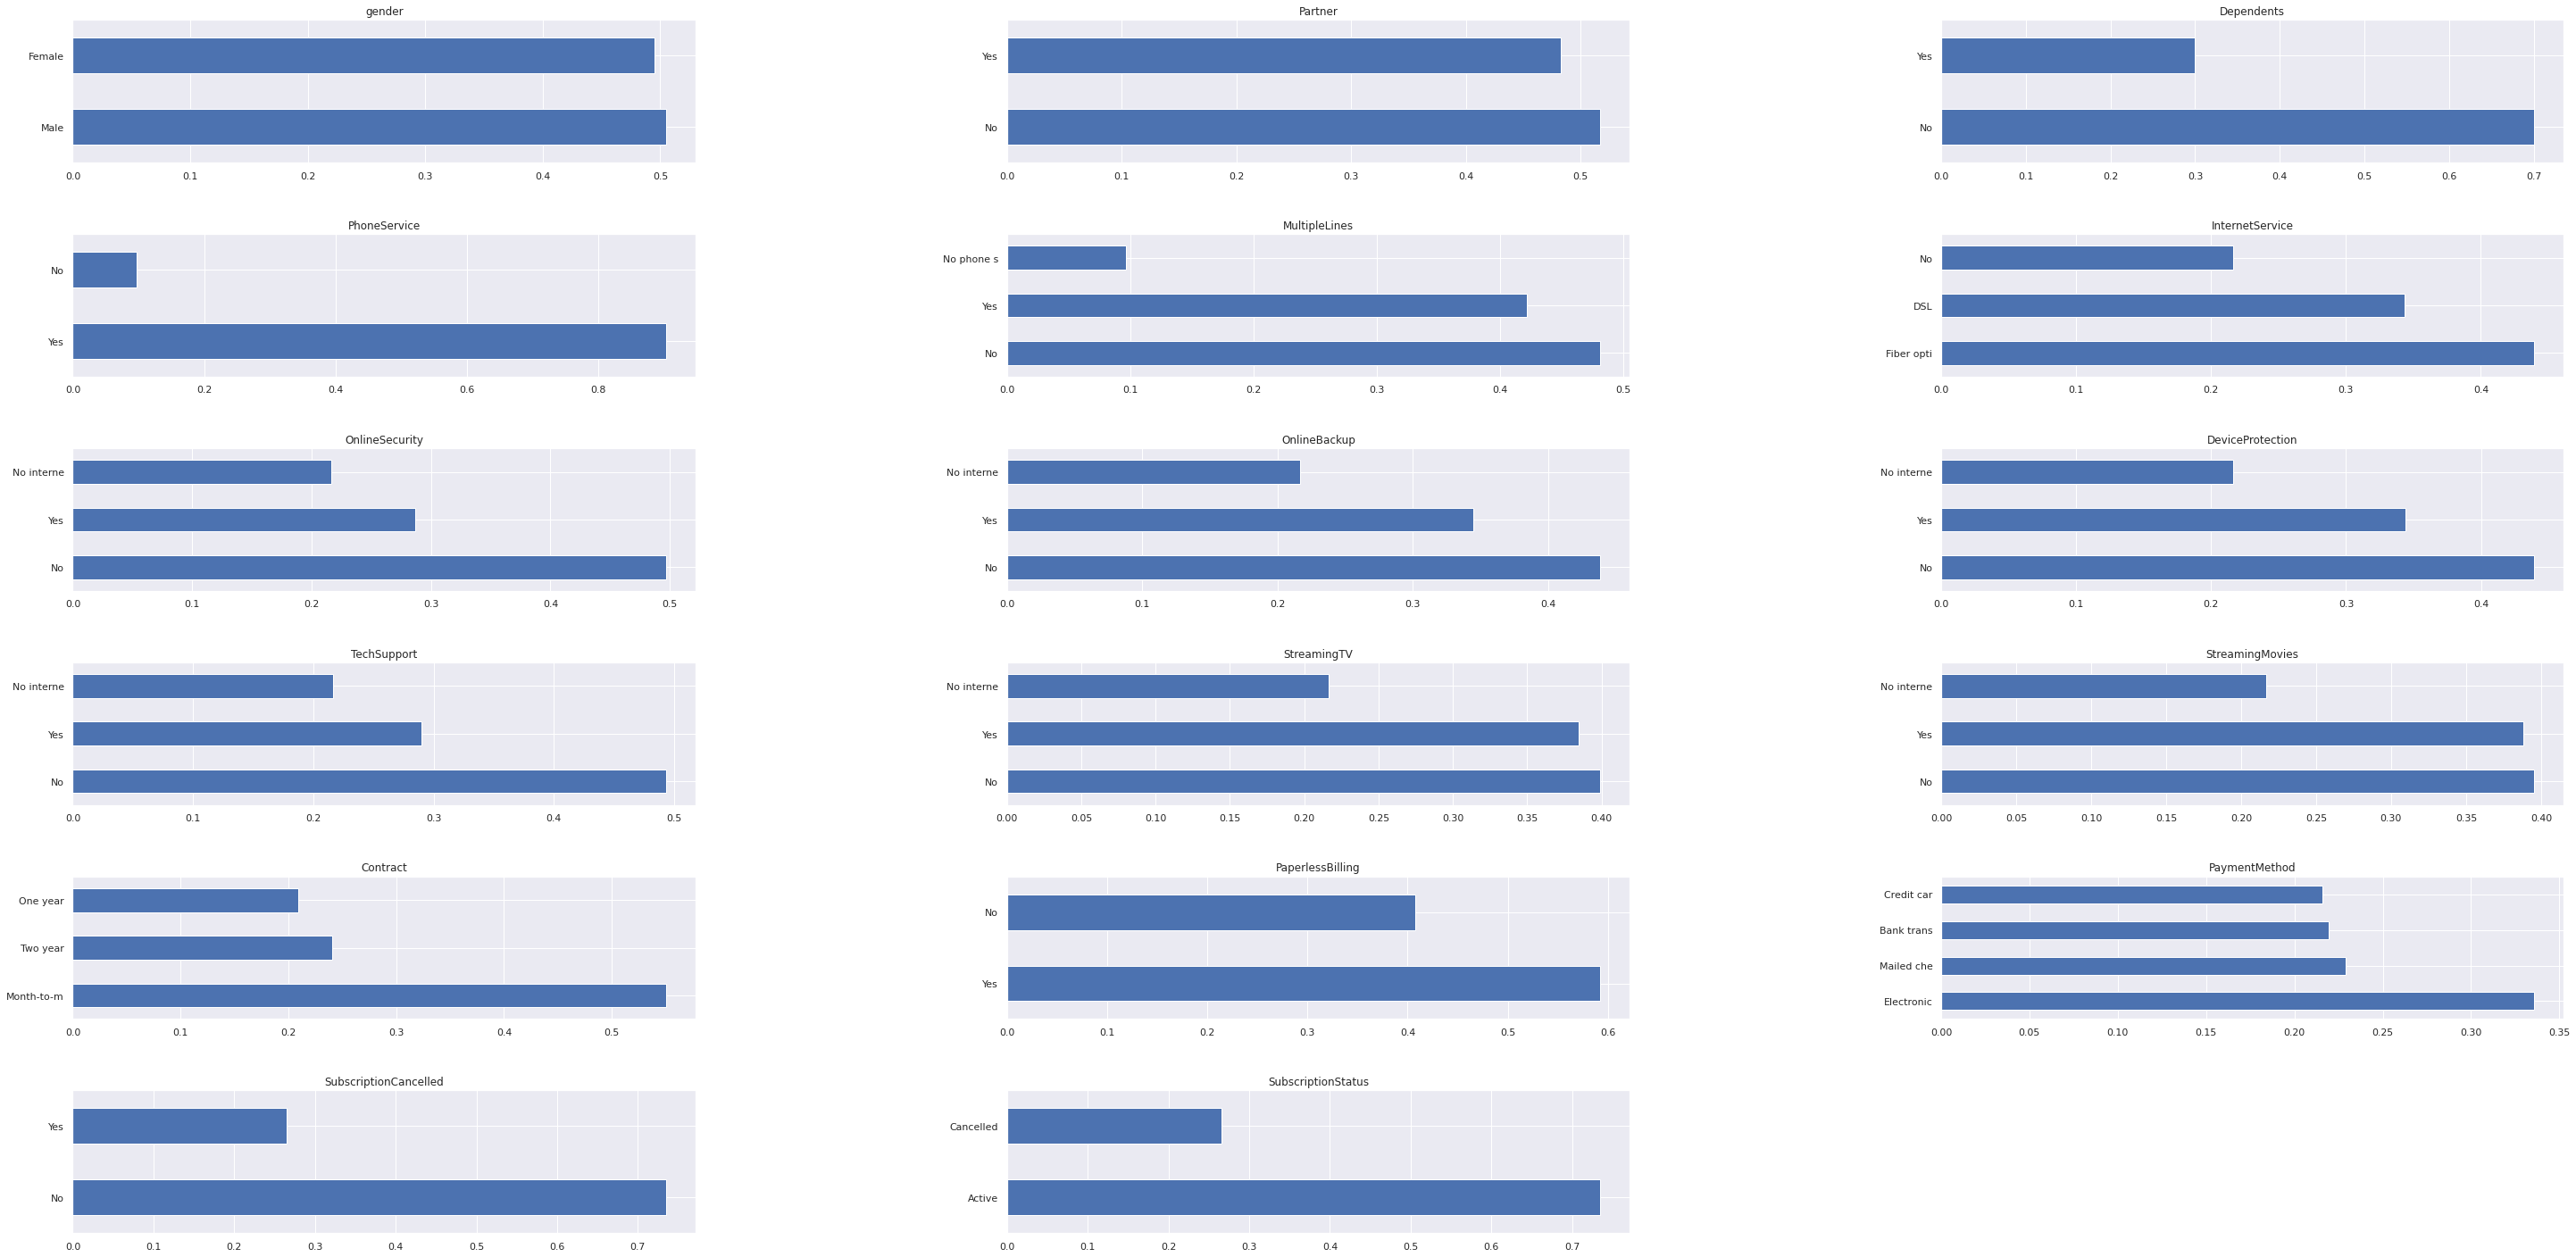

In [ ]:
fig = plt.figure(figsize=(50,25))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(churn_df_2):
    ax = fig.add_subplot(6, 3, i + 1)
    ax.set_title(column)
    
    g = churn_df[column].value_counts(normalize = True).plot(kind = 'barh')
    substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
    g.set(yticklabels=substrings)
    #plt.xlabel('Distribution')    

##### Plotting Categorical Variable counts by Response Or Target (%) #####

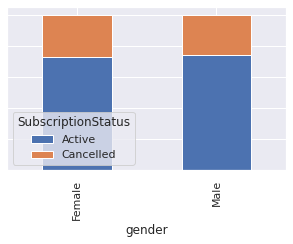

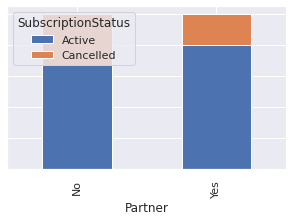

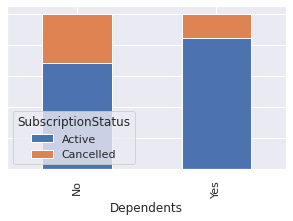

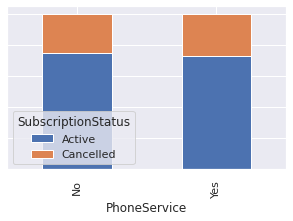

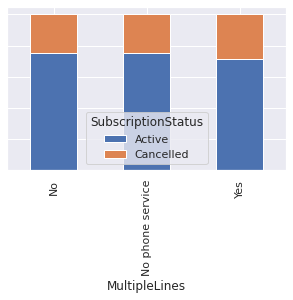

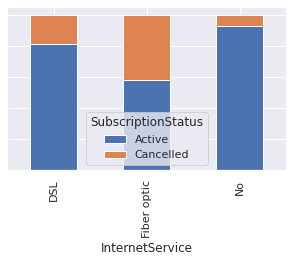

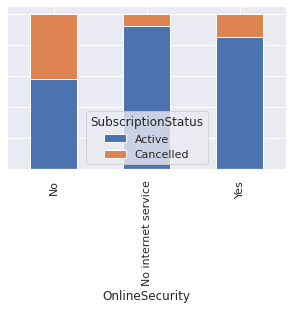

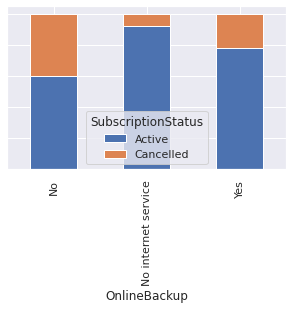

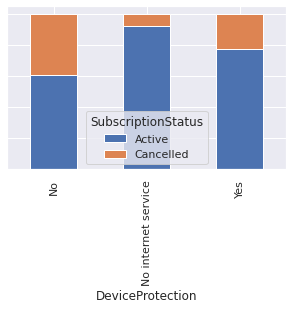

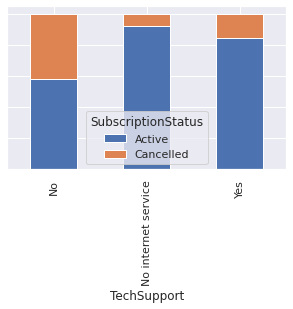

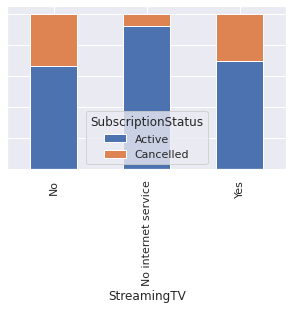

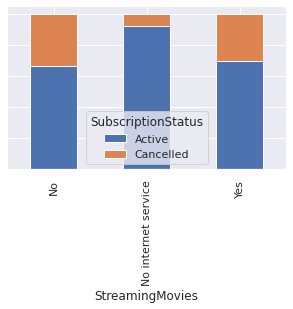

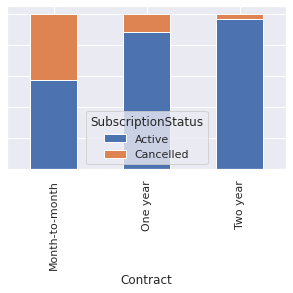

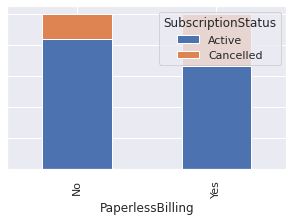

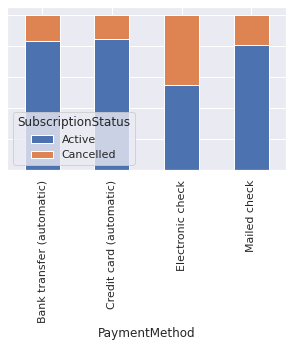

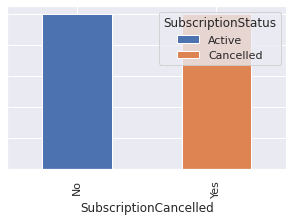

In [ ]:
for i, column in enumerate(churn_df_2.loc[:,churn_df_2.columns != 'SubscriptionStatus']):
  ax.set_title(column)
  g = churn_df_2.groupby(column)['SubscriptionStatus'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True, figsize=(5,3))
  substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
  g.set(yticklabels=substrings)

###Anomaly Detection### 


#### Missing Value Checks & Treatment ####

##### Checking Missing Value #####

In [ ]:
churn_df.isnull().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges             11
SubscriptionCancelled     0
CustomerId                0
SubscriptionStatus        0
CallsPerMonth             0
dtype: int64

In [ ]:
#Display the null values
churn_df[churn_df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SubscriptionCancelled,CustomerId,SubscriptionStatus,CallsPerMonth
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,4472-LVYGI,Active,30
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,3115-CZMZD,Active,33
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,5709-LVOEQ,Active,8
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,4367-NUYAO,Active,17
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,1371-DWPAZ,Active,42
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,7644-OMVMY,Active,25
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,3213-VVOLG,Active,22
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,2520-SGTTA,Active,18
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,2923-ARZLG,Active,36
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,4075-WKNIU,Active,30


In [ ]:
## Tenure has value of zero but these 11 customers have Monthly charges. 
## It is therefore safe to assume that these customers have only subscribed for less than a month
## TotalCharges for these 11 customer should be same as monthly charges
## However, this might not hold true because Total charges is the product of tenure and monthly charges. Therefore,
## if tenure is 0 and monthly charge is 20 for example, then total charge is 0. This means that customer has yet to pay for their first month
## Null values should therefore be left alone

##### Treatment of Missing Value #####

*We shall demonstrate single and multiple imputation techniques*

###### Single Imputation Technique (Simple Linear Regression) ######

In [ ]:
#Add a Cross Feature: MonthlyCharges * Tenure
churn_df["TenureMC"] = churn_df["MonthlyCharges"] * churn_df["tenure"]

#Create a Simple Linear Regression between Total Charges & Tenure
newdf = churn_df[["TenureMC", "TotalCharges"]]
newdf = newdf.dropna()
newdf.describe() 
#These two variables are not equal

,TenureMC,TotalCharges
count,7032.000000,7032.000000
mean,2283.147248,2283.300441
std,2264.703327,2266.771362
min,18.800000,18.800000
25%,397.800000,401.450000
50%,1394.575000,1397.475000
75%,3791.250000,3794.737500
max,8550.000000,8684.800000


In [ ]:
#Run a Simple Linear Regression OLS Method
pd.options.display.float_format = "{:,.5f}".format
import statsmodels.api as sm
x = newdf['TenureMC']
y = newdf['TotalCharges']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
results.params

const      -0.92586
TenureMC    1.00047
dtype: float64

In [ ]:
#Create a reg_impute function for the imputation exercise using Simple Linear Regression
def reg_impute(x):
  b0 = results.params.const
  b1 = results.params.TenureMC
  return b0 + b1*x

In [ ]:
#Create a new total charges variable and see if the imputation has worked
churn_df['TotalChargesImputed'] = churn_df['TotalCharges'].fillna(churn_df.apply(lambda row: reg_impute(row['TenureMC']), axis =1))


In [ ]:
#Some sense check of the data post imputation
churn_df.agg({'TotalChargesImputed':['sum', 'min', 'max', 'mean'],'TotalCharges':['sum', 'min', 'max', 'mean'] })

,TotalChargesImputed,TotalCharges
sum,"16,056,158.51558","16,056,168.70000"
min,-0.92586,18.80000
max,"8,684.80000","8,684.80000"
mean,"2,279.73286","2,283.30044"


###### Single Imputation Technique (Substitution with Mean Value) ######

In [ ]:
churn_df['TotalChargesImputedMean'] = churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].mean())


In [ ]:
#Some sense check of the data post imputation
churn_df.agg({'TotalChargesImputed':['sum', 'min', 'max', 'mean'],'TotalChargesImputedMean':['sum', 'min', 'max', 'mean'],'TotalCharges':['sum', 'min', 'max', 'mean'] })

,TotalChargesImputed,TotalChargesImputedMean,TotalCharges
sum,"16,056,158.51558","16,081,285.00485","16,056,168.70000"
min,-0.92586,18.80000,18.80000
max,"8,684.80000","8,684.80000","8,684.80000"
mean,"2,279.73286","2,283.30044","2,283.30044"


In [ ]:
churn_df[churn_df['TotalCharges'].isnull()][['TotalCharges','TotalChargesImputed','TotalChargesImputedMean']]

,TotalCharges,TotalChargesImputed,TotalChargesImputedMean
488,nan,-0.92586,"2,283.30044"
753,nan,-0.92586,"2,283.30044"
936,nan,-0.92586,"2,283.30044"
1082,nan,-0.92586,"2,283.30044"
1340,nan,-0.92586,"2,283.30044"
3331,nan,-0.92586,"2,283.30044"
3826,nan,-0.92586,"2,283.30044"
4380,nan,-0.92586,"2,283.30044"
5218,nan,-0.92586,"2,283.30044"
6670,nan,-0.92586,"2,283.30044"


In [ ]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(0)

In [ ]:
#Drop TotalChargesImputed, TotalChargesImputedMean & TenureMC now
churn_df = churn_df.drop(columns = ['TotalChargesImputed', 'TotalChargesImputedMean', 'TenureMC'])

In [ ]:
churn_df.isnull().sum()

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
SubscriptionCancelled    0
CustomerId               0
SubscriptionStatus       0
CallsPerMonth            0
dtype: int64

In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,CallsPerMonth
count,"7,043.00000","7,043.00000","7,043.00000","7,043.00000","7,043.00000"
mean,0.16215,32.37115,64.76169,"2,279.73430",29.97345
std,0.36861,24.55948,30.09005,"2,266.79447",14.72025
min,0.00000,0.00000,18.25000,0.00000,5.00000
25%,0.00000,9.00000,35.50000,398.55000,17.00000
50%,0.00000,29.00000,70.35000,"1,394.55000",30.00000
75%,0.00000,55.00000,89.85000,"3,786.60000",43.00000
max,1.00000,72.00000,118.75000,"8,684.80000",55.00000


In [ ]:
# from google.colab import files
# churn_df.to_csv('churn_df.csv') 
# files.download('churn_df.csv')

In [ ]:
# MultipleLines (Depends on: Phone services)
# OnlineSecurity (Depends on: Internet service)
# OnlineBackup (Depends on: Internet service)
# DeviceProtection (Depends on: Internet service)
# TechSupport (Depends on: Internet service)
# StreamingTV (Depends on: Internet service)
# StreamingMovies (Depends on: Internet service)


# In variables above, they all have 3 categories (Yes, No or No service).
# I am contemplating converting the No service values to null values.
# For example, using tech support should be a yes or no answer but there is a
# third answer which is No internet service, so we can assume that this variable
# depends on the internet service variable

# so we can say something like: Of those who use internet service, how many of them use tech support?
# Therefore we now know that those varibales mentioned above are dependants of the Phone service and Internet service variable


#### Outlier Detection & Treatment ####

##### Boxplot to Detect Outliers #####

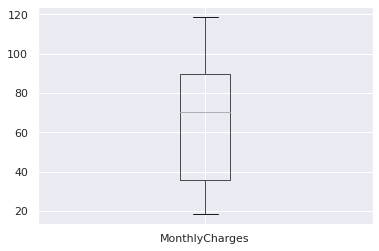

In [ ]:
churn_df.boxplot(['MonthlyCharges'])

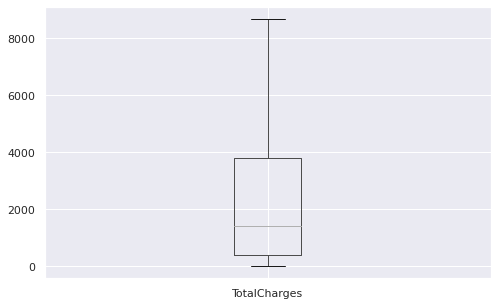

In [ ]:
churn_df.boxplot(['TotalCharges'], figsize=(8,5))

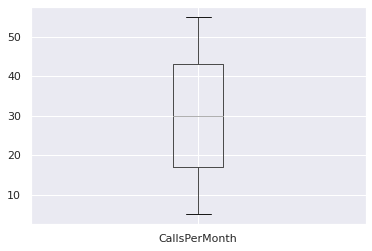

In [ ]:
churn_df.boxplot(['CallsPerMonth'])

### Correlation Matrix & Multicollinearity tests ###

#### Correlation Matrix ####

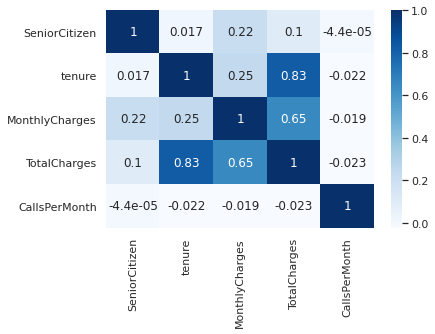

<Figure size 1440x720 with 0 Axes>

In [ ]:
pd.options.display.float_format = "{:,.1f}".format
sns.heatmap(churn_df.corr(), annot=True, cmap=plt.cm.Blues) #different colour combinations available here
#Correlation Matrix Using Pearson Correlation
plt.figure(figsize=(20,10))
plt.show()

#### VIF - Variance Inflation Factor #####

##### Standardising Predictors for testing VIF #####

In [ ]:
#Only Numerical Dataset
churn_df_num = churn_df.select_dtypes(exclude=[object])
churn_df_num = churn_df_num.drop(columns = ['SeniorCitizen']) #Senior citizen is not a numerical variable
churn_df_num.head()

,tenure,MonthlyCharges,TotalCharges,CallsPerMonth
0,1,29.9,29.9,30
1,34,57.0,"1,889.5",10
2,2,53.9,108.2,10
3,45,42.3,"1,840.8",29
4,2,70.7,151.7,54


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
      
# standardize the data attributes
churn_df_num_std = preprocessing.scale(churn_df_num) #standardising only predictors
churn_df_num_std = pd.DataFrame(churn_df_num_std)
churn_df_num_std = churn_df_num_std.rename(columns={0: "Z_tenure", 1: "Z_MonthlyCharges", 2: "Z_TotalCharges", 3: "Z_CallsPerMonth"})
churn_df_num_std.head(3)

,Z_tenure,Z_MonthlyCharges,Z_TotalCharges,Z_CallsPerMonth
0,-1.3,-1.2,-1.0,0.0
1,0.1,-0.3,-0.2,-1.4
2,-1.2,-0.4,-1.0,-1.4


##### VIF on Standardised Variables #####

In [ ]:
#VIF on standardised variables:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(churn_df_num_std.values, i) 
for i in range(churn_df_num_std.shape[1])]

vif["features"] = churn_df_num_std.columns
vif.round(1)

,VIF Factor,features
0,5.8,Z_tenure
1,3.2,Z_MonthlyCharges
2,9.5,Z_TotalCharges
3,1.0,Z_CallsPerMonth


In [ ]:
#Remove Total Charges and see if VIF comes back to acceptable range?
churn_df_num_std= churn_df_num_std.drop(columns=['Z_TotalCharges'])

In [ ]:
#VIF on standardised variables:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(churn_df_num_std.values, i) 
for i in range(churn_df_num_std.shape[1])]

vif["features"] = churn_df_num_std.columns
vif.round(1)

,VIF Factor,features
0,1.1,Z_tenure
1,1.1,Z_MonthlyCharges
2,1.0,Z_CallsPerMonth


## Feature Selection ##

### Relationship Between Predictor & Response (or Target) Variable ###

#### Relationship between Categorical Response & Numerical Variables ####

##### By Simple Avg. #####

In [ ]:
churn_df.groupby(['SubscriptionStatus'])['tenure', 'MonthlyCharges', 'TotalCharges', 'CallsPerMonth'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,tenure,MonthlyCharges,TotalCharges,CallsPerMonth
SubscriptionStatus,,,,
Active,37.6,61.3,"2,549.9",30.0
Cancelled,18.0,74.4,"1,531.8",30.0


##### By using point biserial correlation #####

In [ ]:
churn_df.SubscriptionStatus.unique()

array(['Active', 'Cancelled'], dtype=object)

In [ ]:
# create a list of our conditions
import numpy as np

conditions = [
    (churn_df['SubscriptionStatus'] == "Active"),
    (churn_df['SubscriptionStatus'] == "Cancelled")
    ]

# create a list of the values we want to assign for each condition
values = [1, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
churn_df['SubscriptionStatus2'] = np.select(conditions, values)

# display updated DataFrame
churn_df['SubscriptionStatus2'].unique()

array([1, 0])

In [ ]:
churn_df.groupby(['SubscriptionStatus', 'SubscriptionStatus2']).customerID.nunique()

SubscriptionStatus  SubscriptionStatus2
Active              1                      5174
Cancelled           0                      1869
Name: customerID, dtype: int64

In [ ]:
churn_df[['SubscriptionStatus', 'SubscriptionStatus2']].value_counts()

SubscriptionStatus  SubscriptionStatus2
Active              1                      5174
Cancelled           0                      1869
dtype: int64

In [ ]:
import scipy.stats as stats
cor_1 = stats.pointbiserialr(churn_df.SubscriptionStatus2, churn_df.tenure)
cor_2 = stats.pointbiserialr(churn_df.SubscriptionStatus2, churn_df.MonthlyCharges)
cor_3 = stats.pointbiserialr(churn_df.SubscriptionStatus2, churn_df.TotalCharges)
cor_4 = stats.pointbiserialr(churn_df.SubscriptionStatus2, churn_df.CallsPerMonth)

cor_1, cor_2, cor_3, cor_4

(PointbiserialrResult(correlation=0.352228670113078, pvalue=7.999057960599509e-205),
 PointbiserialrResult(correlation=-0.19335642223784708, pvalue=2.7066456068899293e-60),
 PointbiserialrResult(correlation=0.1983242626039956, pvalue=2.1272116132420323e-63),
 PointbiserialrResult(correlation=-0.0019143509221906131, pvalue=0.8723856867695348))

*Interpreting Point Biserial Correlation:*

* Null hypothesis: The probability that there is no relationship between continuous variable and categirical variable.    

* cor_1 shows a very low p value of 7.99e-205 and a correlation of 0.305 which shows that there is some correlation between tenure and Subscription Status (churn).

* cor_2 shows a very low p-value of 2.7066e-60 and low correlation of 0.193 approx, Monthly charges have very low to no correlation with Subscription status.

* cor_3 also shows a very low p-value of 2.127e-63 with a similar correlation to that of Monthly charges. 

* cor_4 has a negative correlation with subscription status. This value however, is very miniscule. When we look at the p_value, we can see that the value is far greater than 0.05 which shows that callsPerMonth has little to no relationship with subscription status.

#### Relationship between Categorical Response & Categorical Variables ####

##### By Chi-SQ Test #####

Null hypothesis: 

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2 
import numpy as np

In [ ]:
def contigency(x,y=churn_df.SubscriptionStatus):
  chisqt = pd.crosstab(x,y, margins=True)
  
  return chisqt

SubscriptionStatus,Active,Cancelled,All
row_0,,,
Partner,5174,1869,7043
All,5174,1869,7043


In [ ]:
def chisqtest(x,y=churn_df.SubscriptionStatus):
  nl ="\n"
  chisqtst = pd.crosstab(y,x, margins=True)
  value = np.array([chisqtst.iloc[0][0:5].values,
                  chisqtst.iloc[1][0:5].values])
  chi, p, dof = chi2_contingency(value)[0:3]
  format(chi,'.10f'),
  format(p,'.10f'),
  format(dof,'.10f')
  #print(f"Chi2 value= {chi}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
  chiResult = (chi,
               "{:e}".format(p),
               dof)
  
  return (chiResult)

In [ ]:
chisqtest(churn_df["Contract"])

(1184.5965720837926, '1.611440e-256', 3)

In [ ]:
data = [col for col in churn_df.columns if len(churn_df[col].unique()) >= 2 and len(churn_df[col].unique()) <= 4 
                     and col != 'SubscriptionCancelled'
                     and col != 'SubscriptionStatus'
                     and col != 'SubscriptionStatus2']
#chisqDF = pd.DataFrame(data, columns=["Variable"])
churn_df2 = churn_df
data
chiTable = churn_df.filter(data, axis=1)

chiTable

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
chiRes = chiTable.apply(lambda column: chisqtest(column))

In [ ]:
chiRes

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.52237,160.35213,159.41453,189.94033,1.00441,11.33044,732.30959,849.99897,601.81279,558.41937,828.19707,374.20394,375.66148,"1,184.59657",259.16097,648.14233
1,7.701398e-01,1.513481e-35,2.418661e-35,5.688274e-42,6.051952e-01,1.006689e-02,2.069533e-158,6.197672e-184,4.077591e-130,1.039850e-120,3.317584e-179,8.556504e-81,4.136529e-81,1.611440e-256,5.295531e-57,5.883832e-139
2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4


In [ ]:
chiResult2 = chiRes.transpose().values
chiResult2

df = pd.DataFrame(chiResult2,index = data,columns=["chi","p","dof"])
df = df.reset_index()
df.sort_values(by=['chi'], ascending = False, inplace=True)
df

,index,chi,p,dof
13,Contract,"1,184.6",1.611440e-256,3
7,OnlineSecurity,850.0,6.197672e-184,3
10,TechSupport,828.2,3.317584e-179,3
6,InternetService,732.3,2.069533e-158,3
15,PaymentMethod,648.1,5.883832e-139,4
8,OnlineBackup,601.8,4.077591e-130,3
9,DeviceProtection,558.4,1.039850e-120,3
12,StreamingMovies,375.7,4.136529e-81,3
11,StreamingTV,374.2,8.556504e-81,3
14,PaperlessBilling,259.2,5.295531e-57,2


In [ ]:
df["chi"] = pd.to_numeric(df["chi"])
df["p"] = pd.to_numeric(df["p"])
df["dof"] = pd.to_numeric(df["dof"])

In [ ]:
import plotly.express as px

In [ ]:
df['colors'] = 'lightslategray'

df.loc[df['p']> 0.05, 'colors'] = 'crimson'

In [ ]:
churn_df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SubscriptionCancelled,CustomerId,SubscriptionStatus,CallsPerMonth,SubscriptionStatus2
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.9,No,7590-VHVEG,Active,30,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,"1,889.5",No,5575-GNVDE,Active,10,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.2,Yes,3668-QPYBK,Cancelled,10,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,"1,840.8",No,7795-CFOCW,Active,29,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.7,Yes,9237-HQITU,Cancelled,54,0


In [ ]:
px.bar(df, x='index', y='chi', color=df['colors'],title = 'Chi sq values', height =700)

### Choosing the final Features: Dropping the Variables ###

Features to be dropped:
* **'customerID', 'CustomerId':** 
> Simply used to identify customer, not useful in building the model

* **'CallsPerMonth':** 
> looking at the average churn rate of this variable, we can see that churn rate is equal to those who do not churn. So, this variable does not serve as great predictor of churn or “subscription status”.

* **‘gender’, ‘phone service’:**
> Using chi square test, we have calculated that the pValue for both 
variables is greater than 0.05. The null hypothesis states that there is no relationship between these variables and the 'SubscriptionStatus' variable. These two variables have pValues greater than 0.05, so therefore, we cannot reject the null hypothesis for these variables.

* **'TotalCharges':**
> A numerical varibale strongly correlated with Tenure, this varible is to be removed as our VIF identified that it was causing multicollinearity.

* **'SubscriptionStatus', 'SubscriptionCancelled':**
> Both are duplicate values, subscription status was used to create a numerical version that translates 'yes' to 1 and 'no' to 0.









In [ ]:
churn_df = churn_df.drop(columns=['customerID', 'CustomerId', 'gender', 'PhoneService','CallsPerMonth', 'SubscriptionStatus2', 'SubscriptionCancelled', 'TotalCharges'])

## Creating Dummy Variables ##

In [ ]:
cols = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'SubscriptionStatus']

churn_df_dummy = pd.get_dummies(churn_df, columns=cols, drop_first=True)
churn_df_dummy.head(3)

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled
0,0,1,29.9,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,57.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.9,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1



Total churn rate: 26.54%


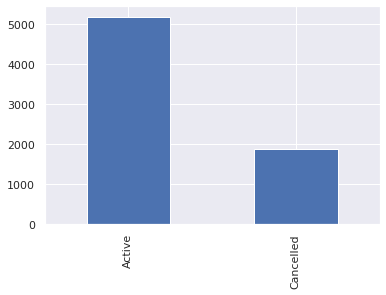

In [ ]:
#check if dataset is balanced
churn_df["SubscriptionStatus"].value_counts(normalize = False).plot(kind='bar') #change it to true to convert it to percentages

#churn rate
churnRate = (churn_df_dummy[churn_df_dummy["SubscriptionStatus_Cancelled"] == 1].shape[0] /churn_df.shape[0]) * 100
churnRate = round(churnRate,2)
print(f"\nTotal churn rate: {churnRate}%")

# does not warranty undersampling or oversampling

 # Model Building # 

1.   Data Partitioning 
2.   Executing the Models
3.   Evaluation of the Models




## Data Partitioning: Split data in train and test ##

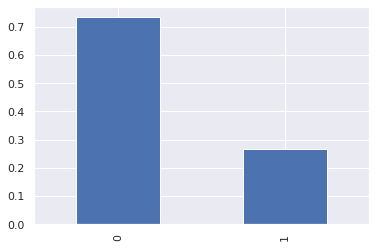

In [ ]:
from sklearn.model_selection import train_test_split
random_state = 0
#output (target)
y = churn_df_dummy['SubscriptionStatus_Cancelled']

#input (predictor)
X = churn_df_dummy.drop('SubscriptionStatus_Cancelled', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# check balance for training dataset
y_train.value_counts(normalize = True).plot(kind='bar')

##Executing Model: Logistic regression##

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='none', max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_test  = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

### Model Interpretation ###

In [ ]:
pd.options.display.float_format = "{:,.5f}".format
df1 = pd.DataFrame(lr_model.coef_).transpose()
df1.columns= ['Coefficients']
df2 =pd.DataFrame(churn_df_dummy.columns)
df2.columns= ['Variables']
coeff_df = pd.merge(df2, df1, how='inner', left_index=True, right_index=True)

In [ ]:
import numpy as np
coeff_df['Raising it to Exp - Chances of Churn'] = np.exp(coeff_df.Coefficients)
coeff_df 

,Variables,Coefficients,Raising it to Exp - Chances of Churn
0,SeniorCitizen,0.26729,1.30642
1,tenure,-0.03586,0.96478
2,MonthlyCharges,-0.00413,0.99588
3,Partner_Yes,0.02262,1.02287
4,Dependents_Yes,-0.20399,0.81547
5,MultipleLines_No phone service,0.43009,1.53740
6,MultipleLines_Yes,0.42880,1.53541
7,InternetService_Fiber optic,1.01363,2.75559
8,InternetService_No,-0.11746,0.88918
9,OnlineSecurity_No internet service,-0.11746,0.88918


In [ ]:
intercept_row = {'Variables':'Intercept', 'Coefficients':lr_model.intercept_, 'Raising it to Exp - Chances of Churn':np.exp(lr_model.intercept_)}
#append row to the dataframe
coeff_df = coeff_df.append(intercept_row, ignore_index=True)
coeff_df

,Variables,Coefficients,Raising it to Exp - Chances of Churn
0,SeniorCitizen,0.26729,1.30642
1,tenure,-0.03586,0.96478
2,MonthlyCharges,-0.00413,0.99588
3,Partner_Yes,0.02262,1.02287
4,Dependents_Yes,-0.20399,0.81547
5,MultipleLines_No phone service,0.43009,1.53740
6,MultipleLines_Yes,0.42880,1.53541
7,InternetService_Fiber optic,1.01363,2.75559
8,InternetService_No,-0.11746,0.88918
9,OnlineSecurity_No internet service,-0.11746,0.88918


score of 0.807 shows a that the model is a good fit. The value is decently close to 1

##Evaluate the model##

### Overall Accuracy ##

In [ ]:
#Gives the overall accuracy of the model 
lr_model.score(X_test,y_test)

0.7989778534923339

In [ ]:
lr_model.score(X_train,y_train)

0.8040514956455888

In [ ]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred_test)

0.7989778534923339

In [ ]:
accuracy_score(y_train, y_pred_train)

0.8040514956455888

### Checking Accuracy by Categories ###

### Overfitting Check ###


$Accuracy = \frac {True Positive +True Negative}{True Positive+False Positve+False Negative+True Negative}$

$Precison = \frac {True Positive}{True Positive+False Positive}$

$Recall = \frac {True Positive}{True Positve+False Negative}$



In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_test))
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.64      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3876
           1       0.66      0.55      0.60      1406

    accuracy                           0.80      5282
   macro avg       0.75      0.72      0.74      5282
weighted avg       0.80      0.80      0.80      5282



The accuracy value of 0.80 can be interpreted as the model being  approximately 80% accurate. However, we should hone in on the false negative and false postive values. The false positive represents the number of times the model predicted that a customer churned when they did not. The false negative defines those who churned but where predicted as not churning. 

We can look at the precision value to better understand the numbers that we see. For the zero value (no churn), we have a precison value of 0.84, meaning that those who were predicted as not churning was correct 84% of the time and wrong 16% of the time which seems to be good. However when we look at one (churn), we can see the precision value of 0.66, which is worse. 34% of those who churned are predicted incorrectly. So when you look at it plainly, 66% of those predicted to churn are correct but 34% is wrong, this is a rather large value of inaccuracy.

Predicted     0    1
Actual              
0          1163  135
1           219  244
Predicted     0    1
Actual              
0          3469  407
1           628  778


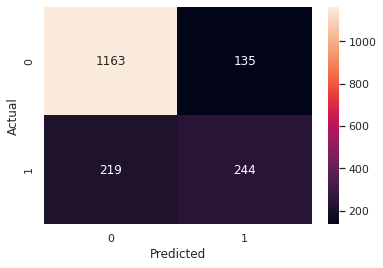

In [ ]:
confusion_matrix = pd.crosstab(y_test,y_pred_test,rownames=['Actual'],colnames=['Predicted'])
confusion_matrix2 = pd.crosstab(y_train,y_pred_train,rownames=['Actual'],colnames=['Predicted'])

print(confusion_matrix)
print(confusion_matrix2)


sns.heatmap(confusion_matrix,annot=True, fmt= 'g')


#see if the values change if the probability thresholds are changed#

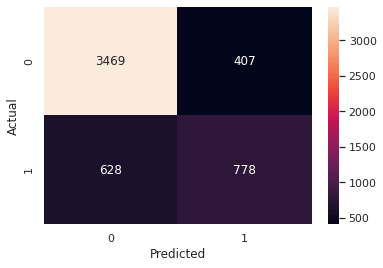

In [ ]:
sns.heatmap(confusion_matrix2,annot=True, fmt= 'g')

### ROC, AUC, Gain Charts Here ###

In [ ]:
from sklearn.metrics import roc_auc_score
print(np.round(roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]), 3)*100,'%')

82.8 %


In [ ]:
print(np.round(roc_auc_score(y_train, lr_model.predict_proba(X_train)[:, 1]), 3)*100,'%')

85.2 %


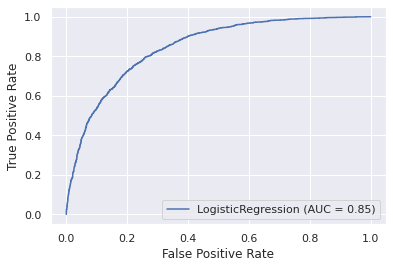

In [ ]:
metrics.plot_roc_curve(lr_model, X, y)

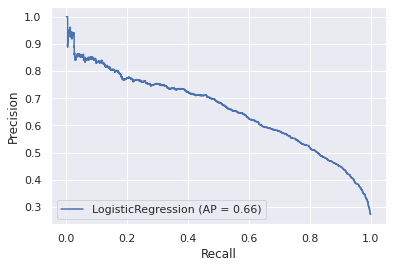

In [ ]:
metrics.plot_precision_recall_curve(lr_model, X, y) 

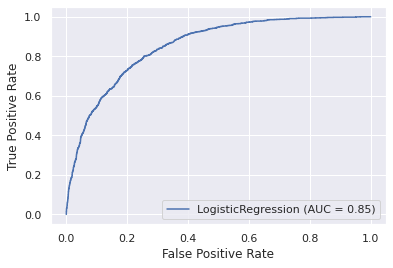

In [ ]:
metrics.plot_roc_curve(lr_model, X_train, y_train)

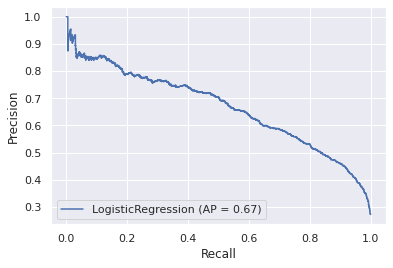

In [ ]:
metrics.plot_precision_recall_curve(lr_model, X_train, y_train) 

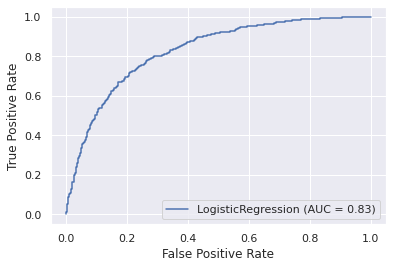

In [ ]:
metrics.plot_roc_curve(lr_model, X_test, y_test)

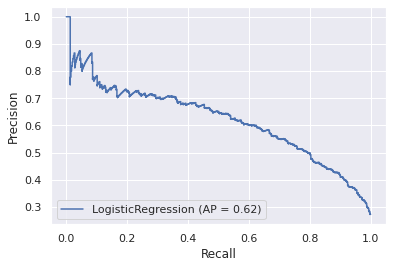

In [ ]:
metrics.plot_precision_recall_curve(lr_model, X_test, y_test) 

## Dealing with Misclassification ##

In [ ]:
#Append Churn Probability to the entire dataset
churn_probability = pd.DataFrame(lr_model.predict_proba(X))
churn_probability.columns = ['Probability for Churn = 0', 'Probability for Churn = 1']
churn_df_dummy = pd.merge(churn_df_dummy, churn_probability, how = 'inner', left_index=True, right_index=True)
churn_df_dummy.head(3)

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled,Probability for Churn = 0,Probability for Churn = 1
0,0,1,29.85000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.43590,0.56410
1,0,34,56.95000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.95263,0.04737
2,0,2,53.85000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.72651,0.27349


In [ ]:
y_pred = pd.DataFrame(lr_model.predict(X))
y_pred.columns = ['Churn Prediction']

In [ ]:
churn_df_dummy = pd.merge(churn_df_dummy, y_pred, how = 'inner', left_index=True, right_index=True)
churn_df_dummy

,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled,Probability for Churn = 0,Probability for Churn = 1,Churn Prediction
0,0,1,29.85000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.43590,0.56410,1
1,0,34,56.95000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.95263,0.04737,0
2,0,2,53.85000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.72651,0.27349,0
3,0,45,42.30000,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.96022,0.03978,0
4,0,2,70.70000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.31106,0.68894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80000,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0.86237,0.13763,0
7039,0,72,103.20000,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0.91657,0.08343,0
7040,0,11,29.60000,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.60851,0.39149,0
7041,1,4,74.40000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.25008,0.74992,1


In [ ]:
#Add customer id and download the data to check how the probabilities are calculated to develop the intuition.
churn_df_final = pd.merge(churn_df2.customerID, churn_df_dummy, left_index=True, right_index=True)

In [ ]:
churn_df_final.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled,Probability for Churn = 0,Probability for Churn = 1,Churn Prediction
0,7590-VHVEG,0,1,29.85000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.43590,0.56410,1
1,5575-GNVDE,0,34,56.95000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.95263,0.04737,0
2,3668-QPYBK,0,2,53.85000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.72651,0.27349,0


#### Calculate Revenue Loss ####

- *Business has decided to offer 50% discount to customers who are likely to churn*

- *We shall calculate the revenue impact of the model if the offer is for 6 months*

##### Scenario 0: No customer is at risk #####

In [ ]:
#Max Revenue that can be earned in 6 month if nobody churned
max_revenue = round(sum(churn_df_final.MonthlyCharges*6),3)
print('£',f"{max_revenue:,}")

£ 2,736,699.6


##### Scenario 1: When no customers are offered any discount package #####

In [ ]:
revenue_sc1 = max_revenue - round(sum(churn_df_final.loc[churn_df_final['SubscriptionStatus_Cancelled'] == 1, 'MonthlyCharges'])*6, 2)
print('The revenue is £',f"{revenue_sc1:,}")
print('The loss in revenue is £', f"{round(max_revenue - revenue_sc1,2):,}" )

The revenue is £ 1,901,914.5
The loss in revenue is £ 834,785.1


##### Scenario 2: When all customers are offered a 50% discount for 6 months#####

In [ ]:
discount = 0.50
revenue_sc2 = max_revenue - round(sum(churn_df_final.MonthlyCharges*6*discount), 2)
print('The revenue is £',f"{revenue_sc2:,}")
print('The loss in revenue is £', f"{round(max_revenue - revenue_sc2,2):,}" )

The revenue is £ 1,368,349.8
The loss in revenue is £ 1,368,349.8


##### Scenario 3: When all customers identified as risky by model are offered a 50% discount for 6 months#####

In [ ]:
#Revenue lost due to misclassification
rev_loss_mc = sum(churn_df_final.loc[(churn_df_final['Churn Prediction'] == 0) & (churn_df_final['SubscriptionStatus_Cancelled'] == 1), 'MonthlyCharges'])*6

In [ ]:
#Revenue lost due to model
rev_loss_mod = sum(churn_df_final.loc[(churn_df_final['Churn Prediction'] == 1), 'MonthlyCharges'])*6*0.50

In [ ]:
revenue_sc3 = max_revenue - rev_loss_mc - rev_loss_mod
print('The revenue is £',f"{round(revenue_sc3,2):,}")
print('The loss in revenue is £', f"{round(max_revenue - revenue_sc3,2):,}" )

The revenue is £ 2,019,394.05
The loss in revenue is £ 717,305.55


### Adjusting Probability Thresholds ###

In [ ]:
Y_pred_new = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.3).astype(int))

Y_pred_new.columns = ['Churn Prediction with Probability Threshold >.30']
churn_df_final = pd.merge(churn_df_final, Y_pred_new, how = 'inner', left_index=True, right_index=True)


Probability threshold of 0.37

In [ ]:
Y_pred_P_37 = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.37).astype(int))
Y_pred_P_37.columns = ['Churn Prediction with Probability Threshold >.37']
churn_df_final = pd.merge(churn_df_final, Y_pred_P_37, how = 'inner', left_index=True, right_index=True)

Probability threshold of 0.39

In [ ]:
Y_pred_P_39 = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.39).astype(int))
Y_pred_P_39.columns = ['Churn Prediction with Probability Threshold >.39']
churn_df_final = pd.merge(churn_df_final, Y_pred_P_39, how = 'inner', left_index=True, right_index=True)

Probability threshold of 0.42

In [ ]:
Y_pred_P_42 = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.42).astype(int))
Y_pred_P_42.columns = ['Churn Prediction with Probability Threshold >.42']
churn_df_final = pd.merge(churn_df_final, Y_pred_P_42, how = 'inner', left_index=True, right_index=True)

Probability threshold of 0.45

In [ ]:
Y_pred_P_45 = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.45).astype(int))
Y_pred_P_45.columns = ['Churn Prediction with Probability Threshold >.45']
churn_df_final = pd.merge(churn_df_final, Y_pred_P_45, how = 'inner', left_index=True, right_index=True)

Probability threshold of 0.48

In [ ]:
Y_pred_P_48 = pd.DataFrame((lr_model.predict_proba(X)[:,1]>0.48).astype(int))
Y_pred_P_48.columns = ['Churn Prediction with Probability Threshold >.48']
churn_df_final = pd.merge(churn_df_final, Y_pred_P_48, how = 'inner', left_index=True, right_index=True)

churn prediction for probabilities starting from 0 to 100% using increment of 5%

In [ ]:
p_list = []

n=0
while n >= 0 and n <= 1.05:
  p_list.append(round(n,2))
  n+=0.05

data = [pd.DataFrame((lr_model.predict_proba(X)[:,1]>i).astype(int), 
                     columns=[f'churn prediction with probability threshold > {i}']) for i in p_list]

for i in data:
  churn_df_final = pd.merge(churn_df_final, i, how = 'inner', left_index=True, right_index=True)

churn_df_final

,customerID,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled,Probability for Churn = 0,Probability for Churn = 1,Churn Prediction,Churn Prediction with Probability Threshold >.30,Churn Prediction with Probability Threshold >.37,Churn Prediction with Probability Threshold >.39,Churn Prediction with Probability Threshold >.42,Churn Prediction with Probability Threshold >.45,Churn Prediction with Probability Threshold >.48,churn prediction with probability threshold > 0,churn prediction with probability threshold > 0.05,churn prediction with probability threshold > 0.1,churn prediction with probability threshold > 0.15,churn prediction with probability threshold > 0.2,churn prediction with probability threshold > 0.25,churn prediction with probability threshold > 0.3,churn prediction with probability threshold > 0.35,churn prediction with probability threshold > 0.4,churn prediction with probability threshold > 0.45,churn prediction with probability threshold > 0.5,churn prediction with probability threshold > 0.55,churn prediction with probability threshold > 0.6,churn prediction with probability threshold > 0.65,churn prediction with probability threshold > 0.7,churn prediction with probability threshold > 0.75,churn prediction with probability threshold > 0.8,churn prediction with probability threshold > 0.85,churn prediction with probability threshold > 0.9,churn prediction with probability threshold > 0.95,churn prediction with probability threshold > 1.0
0,7590-VHVEG,0,1,29.85000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.43590,0.56410,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,34,56.95000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.95263,0.04737,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,53.85000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.72651,0.27349,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,0,45,42.30000,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.96022,0.03978,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.31106,0.68894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80000,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0.86237,0.13763,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7039,2234-XADUH,0,72,103.20000,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0.91657,0.08343,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7040,4801-JZAZL,0,11,29.60000,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.60851,0.39149,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,8361-LTMKD,1,4,74.40000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.25008,0.74992,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


In [ ]:
n_list = []
n=0.56
while n >= 0.56 and n <= 0.6:
  n_list.append(round(n,2))
  n+=0.01

data = [pd.DataFrame((lr_model.predict_proba(X)[:,1]>i).astype(int), 
                     columns=[f'churn prediction with probability threshold > {i}']) for i in n_list]

for i in data:
  churn_df_final = pd.merge(churn_df_final, i, how = 'inner', left_index=True, right_index=True)



In [ ]:
churn_df_final.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SubscriptionStatus_Cancelled,Probability for Churn = 0,Probability for Churn = 1,Churn Prediction,Churn Prediction with Probability Threshold >.30,Churn Prediction with Probability Threshold >.37,Churn Prediction with Probability Threshold >.39,Churn Prediction with Probability Threshold >.42,Churn Prediction with Probability Threshold >.45,Churn Prediction with Probability Threshold >.48,churn prediction with probability threshold > 0,churn prediction with probability threshold > 0.05,churn prediction with probability threshold > 0.1,churn prediction with probability threshold > 0.15,churn prediction with probability threshold > 0.2,churn prediction with probability threshold > 0.25,churn prediction with probability threshold > 0.3,churn prediction with probability threshold > 0.35,churn prediction with probability threshold > 0.4,churn prediction with probability threshold > 0.45,churn prediction with probability threshold > 0.5,churn prediction with probability threshold > 0.55,churn prediction with probability threshold > 0.6,churn prediction with probability threshold > 0.65,churn prediction with probability threshold > 0.7,churn prediction with probability threshold > 0.75,churn prediction with probability threshold > 0.8,churn prediction with probability threshold > 0.85,churn prediction with probability threshold > 0.9,churn prediction with probability threshold > 0.95,churn prediction with probability threshold > 1.0,churn prediction with probability threshold > 0.56,churn prediction with probability threshold > 0.57,churn prediction with probability threshold > 0.58,churn prediction with probability threshold > 0.59
0,7590-VHVEG,0,1,29.85000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.43590,0.56410,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5575-GNVDE,0,34,56.95000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.95263,0.04737,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,53.85000,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.72651,0.27349,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,0,45,42.30000,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.96022,0.03978,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.31106,0.68894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1


In [ ]:
print(metrics.classification_report(y_test, y_pred_test))
print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y, Y_pred_new))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.64      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3876
           1       0.66      0.55      0.60      1406

    accuracy                           0.80      5282
   macro avg       0.75      0.72      0.74      5282
weighted avg       0.80      0.80      0.80      5282

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5174
           1       0.55      0.76      0.63      1869

    accuracy                           0.77      7043
   macro avg       0.72      0.76      0.73      7043
weighted avg       0.80      0.77      0.78      7043



In [ ]:
Y_pred_5 = churn_df_final['churn prediction with probability threshold > 0.5']
print(metrics.classification_report(y, Y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5174
           1       0.65      0.55      0.60      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.72      0.73      7043
weighted avg       0.79      0.80      0.80      7043



In [ ]:
Y_pred_55 = churn_df_final['churn prediction with probability threshold > 0.55']
print(metrics.classification_report(y, Y_pred_55))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      5174
           1       0.69      0.49      0.58      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.71      0.73      7043
weighted avg       0.80      0.81      0.80      7043



##### Benefit of adjusting Probability Threshold #####

###### Scenario 3/1: When all customers identified as risky by new model are offered a 50% discount for 6 months ######

In [ ]:
#Revenue lost due to misclassification
rev_loss_mc2 = sum(churn_df_final.loc[(churn_df_final['Churn Prediction with Probability Threshold >.30'] == 0) & (churn_df_final['SubscriptionStatus_Cancelled'] == 1), 'MonthlyCharges'])*6

In [ ]:
#Revenue lost due to model
rev_loss_mod2 = sum(churn_df_final.loc[(churn_df_final['Churn Prediction with Probability Threshold >.30'] == 1), 'MonthlyCharges'])*6*0.50


In [ ]:
revenue_sc3_2 = max_revenue - rev_loss_mc2 - rev_loss_mod2
print('The revenue is £',f"{round(revenue_sc3_2,2):,}")
print('The loss in revenue is £', f"{round(max_revenue - revenue_sc3_2,2):,}" )

The revenue is £ 1,966,147.35
The loss in revenue is £ 770,552.25


create a function to calculate the total revenue for any probability threshold in "churn_df_final"

In [ ]:

revenue_df = pd.DataFrame({'Probability': p_list})
optimal_Rev_df = pd.DataFrame({'Probability': n_list})
Revenue = pd.Series([])
Optimal_Rev = pd.Series([])


def calc_revenue(n, discount, month):
  # n is probability threshold
  
  Total_revenue = round(sum(churn_df_final.MonthlyCharges*month),3)
  rev_loss_misc = sum(churn_df_final.loc[(churn_df_final[f'churn prediction with probability threshold > {n}'] == 0) & (churn_df_final['SubscriptionStatus_Cancelled'] == 1), 'MonthlyCharges'])*month
  rev_loss_model = sum(churn_df_final.loc[(churn_df_final[f'churn prediction with probability threshold > {n}'] == 1), 'MonthlyCharges'])*month*discount
  revenue = Total_revenue - rev_loss_model - rev_loss_misc

  for i in range(len(revenue_df)):
    if revenue_df['Probability'][i]==n:
      Revenue[i]=revenue

  for i in range(len(optimal_Rev_df)):
    if optimal_Rev_df['Probability'][i]==n:
      Optimal_Rev[i]=revenue

  

  # print('The revenue is £',f"{round(revenue,2):,}")

  # print('The loss in revenue is £', f"{round(max_revenue - revenue,2):,}" )

calc_revenue(0,0.5,6)
calc_revenue(0.05,0.5,6)
calc_revenue(0.1,0.5,6)
calc_revenue(0.15,0.5,6)
calc_revenue(0.2,0.5,6)
calc_revenue(0.25,0.5,6)
calc_revenue(0.3,0.5,6)
calc_revenue(0.35,0.5,6)
calc_revenue(0.4,0.5,6)
calc_revenue(0.45,0.5,6)
calc_revenue(0.5,0.5,6)
calc_revenue(0.55,0.5,6)
calc_revenue(0.6,0.5,6)
calc_revenue(0.65,0.5,6)
calc_revenue(0.7,0.5,6)
calc_revenue(0.75,0.5,6)
calc_revenue(0.8,0.5,6)
calc_revenue(0.85,0.5,6)
calc_revenue(0.9,0.5,6)
calc_revenue(0.95,0.5,6)
calc_revenue(1.0,0.5,6)

calc_revenue(0.56,0.5,6)
calc_revenue(0.57,0.5,6)
calc_revenue(0.58,0.5,6)
calc_revenue(0.59,0.5,6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
revenue_df.insert(1, "Revenue", Revenue)

In [ ]:
revenue_df.head()

,Probability,Revenue
0,0.00000,"1,368,349.80000"
1,0.05000,"1,658,737.05000"
2,0.10000,"1,779,263.70000"
3,0.15000,"1,846,127.40000"
4,0.20000,"1,895,713.35000"


In [ ]:
optimal_Rev_df.insert(1,"Revenue", Optimal_Rev)

In [ ]:
optimal_Rev_df

,Probability,Revenue
0,0.56000,"2,026,278.45000"
1,0.57000,"2,025,408.60000"
2,0.58000,"2,023,636.95000"
3,0.59000,"2,019,659.85000"


##### Bar plot showing revenue per probability threshold #####

In [ ]:
fig1 = px.bar(revenue_df, x='Probability', y= 'Revenue', color='Revenue')
fig1

In [ ]:
from google.colab import files
churn_df_final.to_csv('churn_df_final.csv') 
files.download('churn_df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*We shall apply the below formula to calculate probabilities for Churn = 1.*

  **$\Pi_{Churn = 1} = {e^ {\beta_iX_{i}}}/({1+ e^ {\beta_iX_{i}}})$**


## Model Deployment ##



1.   Create a pickle file
2.   Save the model (lr_model) as a pickle file



In [ ]:
import pickle

In [ ]:
with open('lr_model_pickle', 'wb') as f:
  pickle.dump(lr_model,f)

In [ ]:
with open('lr_model_pickle', 'rb') as f:
  lr = pickle.load(f)